## **Препроцессинг**

In [1]:
import numpy as np
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/olegov99/hse-ds-course/master/lab_1/online_shoppers_intention.csv"
data_raw = pd.read_csv(url)

data = data_raw

categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
for column in categorical_columns:
  data[column] = data[column].astype('category')

In [4]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [17]:
data.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

In [18]:
visitor_type_dummies = pd.get_dummies(data['VisitorType'])
traffic_type_dummies = pd.get_dummies(data['TrafficType'], prefix='TrafficType')

region_dummies = pd.get_dummies(data['Region'], prefix='Region')
month_dummies = pd.get_dummies(data['Month'])

data_final = pd.concat((data, visitor_type_dummies, traffic_type_dummies, region_dummies, month_dummies), axis=1)
data_final = data_final.drop(['VisitorType', 'TrafficType', 'Region', 'Month', 'Weekend', 'OperatingSystems', 'Browser', 'ExitRates', 'ProductRelated_Duration'], axis=1)

In [19]:
data_final.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
BounceRates                float64
PageValues                 float64
SpecialDay                 float64
Revenue                       bool
New_Visitor                  uint8
Other                        uint8
Returning_Visitor            uint8
TrafficType_1                uint8
TrafficType_2                uint8
TrafficType_3                uint8
TrafficType_4                uint8
TrafficType_5                uint8
TrafficType_6                uint8
TrafficType_7                uint8
TrafficType_8                uint8
TrafficType_9                uint8
TrafficType_10               uint8
TrafficType_11               uint8
TrafficType_12               uint8
TrafficType_13               uint8
TrafficType_14               uint8
TrafficType_15               uint8
TrafficType_16               uint8
TrafficType_17      

In [20]:
for column in ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay']:
    data_final[column] = (data_final[column] - data_final[column].mean())/data_final[column].std()

In [21]:
data_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Revenue,New_Visitor,Other,Returning_Visitor,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,3.667040,-0.317165,-0.308809,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.457664,-0.317165,-0.308809,False,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,3.667040,-0.317165,-0.308809,False,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,0.573512,-0.317165,-0.308809,False,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.696965,-0.457173,-0.396462,-0.244921,-0.488617,-0.045194,-0.317165,-0.308809,False,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## **Отбор признаков**

In [23]:
from sklearn.model_selection import train_test_split

X = data_final.drop(['Revenue'], axis=1)
y = data_final['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## **Neural Network**

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [95]:
model = Sequential([
    Input(shape=(X_test.shape[1], )),
    Dense(2, activation=tf.nn.softmax)
])

In [96]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
289/289 [==============================] - 1s 979us/step - loss: 0.8406 - accuracy: 0.4904
Epoch 2/10
289/289 [==============================] - 0s 987us/step - loss: 0.3783 - accuracy: 0.8486
Epoch 3/10
289/289 [==============================] - 0s 974us/step - loss: 0.3141 - accuracy: 0.8717
Epoch 4/10
289/289 [==============================] - 0s 978us/step - loss: 0.2952 - accuracy: 0.8802
Epoch 5/10
289/289 [==============================] - 0s 959us/step - loss: 0.2966 - accuracy: 0.8772
Epoch 6/10
289/289 [==============================] - 0s 955us/step - loss: 0.2946 - accuracy: 0.8848
Epoch 7/10
289/289 [==============================] - 0s 974us/step - loss: 0.3033 - accuracy: 0.8807
Epoch 8/10
289/289 [==============================] - 0s 999us/step - loss: 0.2925 - accuracy: 0.8860
Epoch 9/10
289/289 [==============================] - 0s 999us/step - loss: 0.2954 - accuracy: 0.8802
Epoch 10/10
289/289 [==============================] - 0s 989us/step - loss: 0.287

In [98]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

97/97 [==============================] - 0s 877us/step - loss: 0.3007 - accuracy: 0.8774
Test accuracy: 0.8773921728134155 
Test loss: 0.30069735646247864


In [99]:
model = Sequential(
    [
        Input(shape=(X_train.shape[1], )),
        Dense(100),
        Activation('relu'),
        Dense(2, activation='softmax')
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
289/289 [==============================] - 1s 1ms/step - loss: 0.3307 - accuracy: 0.8693
Epoch 2/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.8916
Epoch 3/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9001
Epoch 4/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2366 - accuracy: 0.9018
Epoch 5/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2371 - accuracy: 0.8992
Epoch 6/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2329 - accuracy: 0.9037
Epoch 7/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2219 - accuracy: 0.9088
Epoch 8/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.9085
Epoch 9/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9053
Epoch 10/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2201 - accuracy: 0.9109

In [101]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

97/97 [==============================] - 0s 878us/step - loss: 0.2486 - accuracy: 0.8965

Test accuracy: 0.8965293765068054 
Test loss: 0.24859394133090973 



In [102]:
%%time
n_neurons = [10, 25, 50, 100, 150, 200, 250, 300]
train_err = []
test_err = []

for n in n_neurons:

  model = Sequential(
      [
          Input(shape=(X_train.shape[1], )),
          Dense(n),
          Activation('relu'),
          Dropout(0.1),
          Dense(2, activation='softmax')
      ]
  )
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=10, verbose=0)
  train_loss, _ = model.evaluate(X_train, y_train, verbose=0)
  test_loss, _ = model.evaluate(X_test, y_test, verbose=0)
  train_err.append(train_loss)
  test_err.append(test_loss)

CPU times: user 40.3 s, sys: 2.55 s, total: 42.9 s
Wall time: 31 s


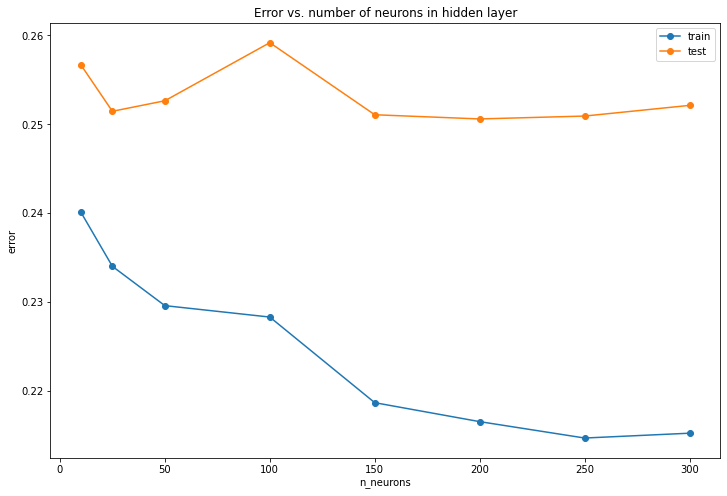

In [103]:
plt.figure(figsize=(12,8))
plt.plot(n_neurons, train_err, '-o', label = 'train')
plt.plot(n_neurons, test_err, '-o', label = 'test')
plt.title('Error vs. number of neurons in hidden layer')
plt.xlabel('n_neurons')
plt.ylabel('error')
plt.legend()
pass


In [104]:
%%time
alpha_arr = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
train_err = []
test_err = []

for alpha in alpha_arr:

  model = Sequential(
      [
          Input(shape=(X_train.shape[1], )),
          Dense(200),
          Activation('relu'),
          Dropout(0.1),
          Dense(2, activation='softmax')
      ]
  )
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=alpha), 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=10, verbose=0)
  train_loss, _ = model.evaluate(X_train, y_train, verbose=0)
  test_loss, _ = model.evaluate(X_test, y_test, verbose=0)
  train_err.append(train_loss)
  test_err.append(test_loss)

CPU times: user 48 s, sys: 2.6 s, total: 50.6 s
Wall time: 35.7 s


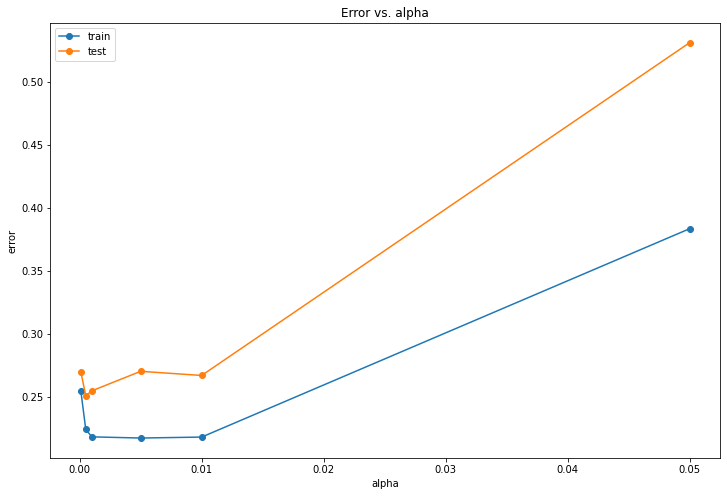

In [105]:
plt.figure(figsize=(12,8))
plt.plot(alpha_arr[:-3], train_err[:-3], '-o', label = 'train')
plt.plot(alpha_arr[:-3], test_err[:-3], '-o', label = 'test')
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [106]:
model = Sequential(
    [
        Input(shape=(X_train.shape[1], )),
        Dense(200),
        Activation('relu'),
        Dropout(0.1),
        Dense(2, activation='softmax')
    ]
)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=0)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

97/97 [==============================] - 0s 945us/step - loss: 0.2496 - accuracy: 0.8962

Test accuracy: 0.8962050080299377 
Test loss: 0.2496160864830017 



In [107]:
pred_labels_train = model.predict(X_train)
pred_labels_train = np.argmax(pred_labels_train, axis=1)

precision = precision_score(y_train, pred_labels_train, average='weighted')
recall    = recall_score(y_train, pred_labels_train, average='weighted')
f1        = f1_score(y_train, pred_labels_train, average='weighted')

print("On Train:\nPrecision {}\nRecall {}\nF1-score {}\n".format(precision, recall, f1))

On Train:
Precision 0.9028589182005935
Recall 0.9081864388450308
F1-score 0.9041549823078815



In [108]:
pred_labels_test = model.predict(X_test)
pred_labels_test = np.argmax(pred_labels_test, axis=1)

precision = precision_score(y_test, pred_labels_test, average='weighted')
recall    = recall_score(y_test, pred_labels_test, average='weighted')
f1        = f1_score(y_test, pred_labels_test, average='weighted')

print("On Test:\nPrecision {}\nRecall {}\nF1-score {}\n".format(precision, recall, f1))

On Test:
Precision 0.8893119186502508
Recall 0.8962049951346092
F1-score 0.8909354802020297

